### Student Performance Indicator

### Life cycle of Machine Learning Project

1. Understanding the Problem Statement
2. Data Collection
3. Data Checks to perform
4. Exploratory data analysis
5. Data Pre-Processing
6. Model Training
7. Choose best model

### Problem Statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

### Data Collection
1. This data consists of 8 column and 1000 rows.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("data/stud.csv")

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.isnull().sum() ### No missing values

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [8]:
df.duplicated().sum() ### No duplicates

0

In [9]:
df.nunique() ### Check the number of unique values of each column

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


1. From above description of numerical data, all means are very close to each other - between 66 and 68.05.
2. All standard deviations are so close - between 14.6 and 15.19
3. While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading much higher = 17

### Exploratory Data Analysis

In [11]:
### Letr us find the number of categories
### And also the number of values in each category

print("Categories in 'gender' variable: ",end='')
print(df['gender'].unique())
print(df["gender"].value_counts())

Categories in 'gender' variable: ['female' 'male']
gender
female    518
male      482
Name: count, dtype: int64


In [12]:
print("Categories in 'race_ethnicity' variable: ",end='')
print(df['race_ethnicity'].unique())
print(df["race_ethnicity"].value_counts())

Categories in 'race_ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64


In [13]:
print("Categories in 'parental_level_of_education' variable: ",end='')
print(df['parental_level_of_education'].unique())
print(df["parental_level_of_education"].value_counts())

Categories in 'parental_level_of_education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64


In [14]:
print("Categories in 'lunch' variable: ",end='')
print(df['lunch'].unique())
print(df["lunch"].value_counts())

Categories in 'lunch' variable: ['standard' 'free/reduced']
lunch
standard        645
free/reduced    355
Name: count, dtype: int64


In [15]:
print("Categories in 'test_preparation_course' variable: ",end='')
print(df['test_preparation_course'].unique())
print(df["test_preparation_course"].value_counts())

Categories in 'test_preparation_course' variable: ['none' 'completed']
test_preparation_course
none         642
completed    358
Name: count, dtype: int64


In [16]:
### Let us keep track of numerical and categorical features

numerical_features = [feature for feature in df.columns if df[feature].dtype!='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype=='O']

In [17]:
print("We have {} numerical features: {}".format(len(numerical_features),numerical_features))
print("We have {} categorical features: {}".format(len(categorical_features),categorical_features))

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [18]:
### Adding Total Score and Average
df["total_score"] = df["math_score"] + df["reading_score"] + df["writing_score"]
df["average_score"] = df["total_score"]/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [19]:
reading_full = df[df["reading_score"]==100]['average_score'].count()
writing_full = df[df["writing_score"]==100]['average_score'].count() ### Not necessarily avergae score.... can be any column
math_full = df[df["math_score"]==100]['average_score'].count()

print("Number of students with full marks in reading: {}".format(reading_full))
print("Number of students with full marks in writing: {}".format(writing_full))
print("Number of students with full marks in math: {}".format(math_full))

Number of students with full marks in reading: 17
Number of students with full marks in writing: 14
Number of students with full marks in math: 7


In [20]:
# reading_full = df[df["reading_score"]==100]["gender"].count()
# print("Number of students with 100 marks in reading:{}".format(reading_full))

In [21]:
reading_less_20 = df[df['reading_score']<=20]['average_score'].count()
writing_less_20 = df[df['writing_score']<=20]['average_score'].count()
math_less_20 = df[df['math_score']<=20]['average_score'].count()

print("Number of students who scored less than 20 in Maths: {}".format(math_less_20))
print("Number of students who scored less than 20 in Reading: {}".format(reading_less_20))
print("Number of students who scored less than 20 in Writing: {}".format(writing_less_20))

Number of students who scored less than 20 in Maths: 4
Number of students who scored less than 20 in Reading: 1
Number of students who scored less than 20 in Writing: 3


1. Students Performed worst in Maths and best in Reading

In [22]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


### Visualisation

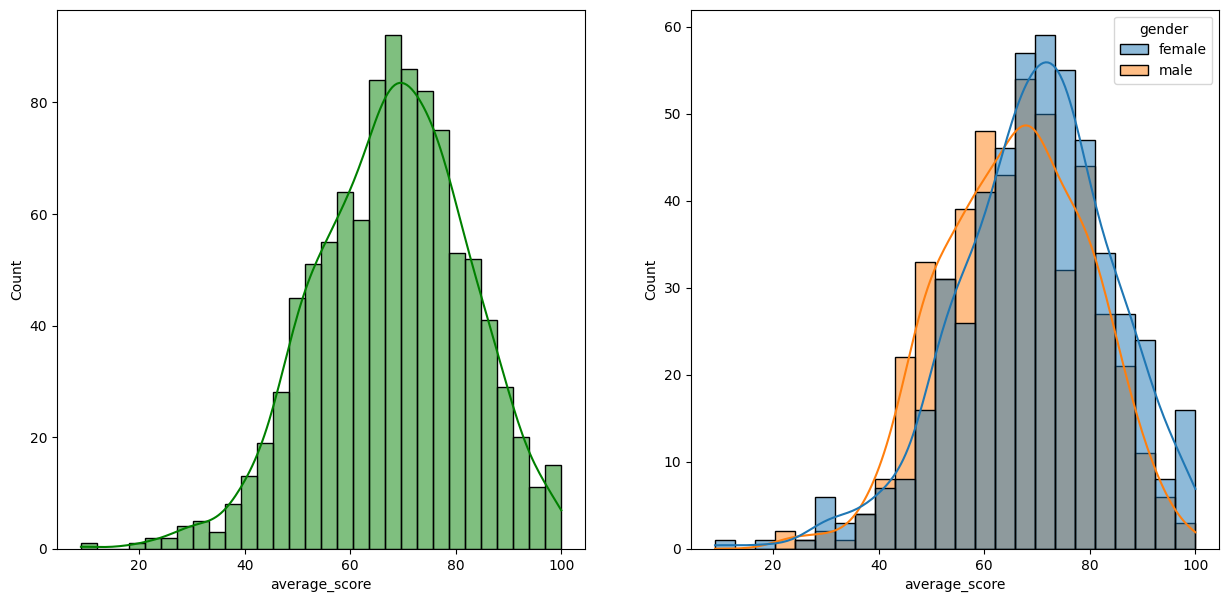

In [23]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x="average_score",bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df,x="average_score",kde=True,hue="gender")
plt.show()

1. Female students perform better than male students.

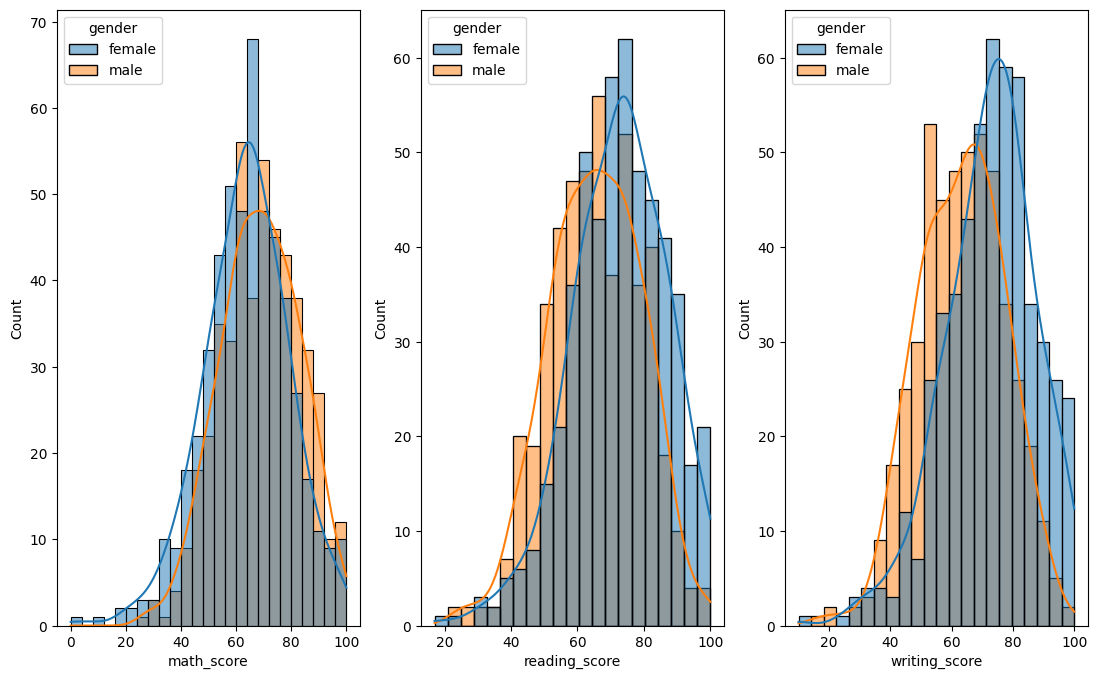

In [47]:
### Let us check for each subject score
fig,axs = plt.subplots(1,3,figsize=(18,8))
plt.subplot(141)
ax = sns.histplot(data=df,x="math_score",kde=True,hue="gender")
plt.subplot(142)
ax = sns.histplot(data=df,x="reading_score",kde=True,hue="gender")
plt.subplot(143)
ax = sns.histplot(data=df,x="writing_score",kde=True,hue="gender")
plt.show()

1. Male students are performing better in Maths than female students.
2. Female students are prforming better in reading and writing than male students.

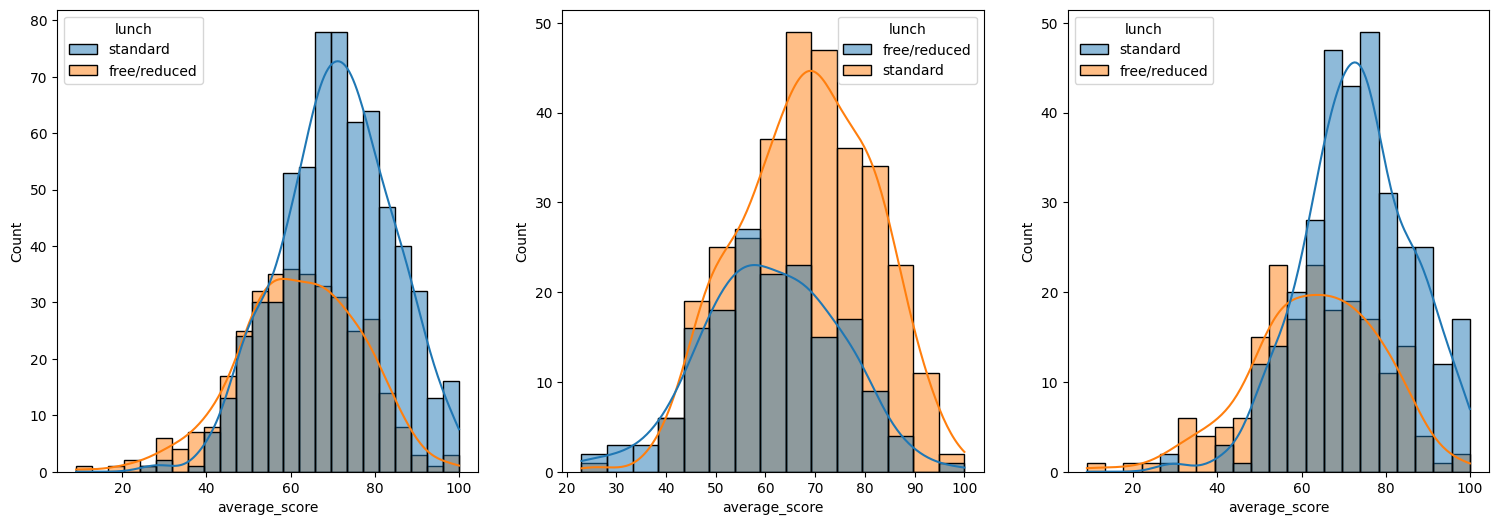

In [33]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax = sns.histplot(data=df,x="average_score",kde=True,hue="lunch")
plt.subplot(142)
ax = sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue="lunch")
plt.subplot(143)
ax = sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue="lunch")
plt.show()

1. Students who are following standard lunch time are getting more marks.

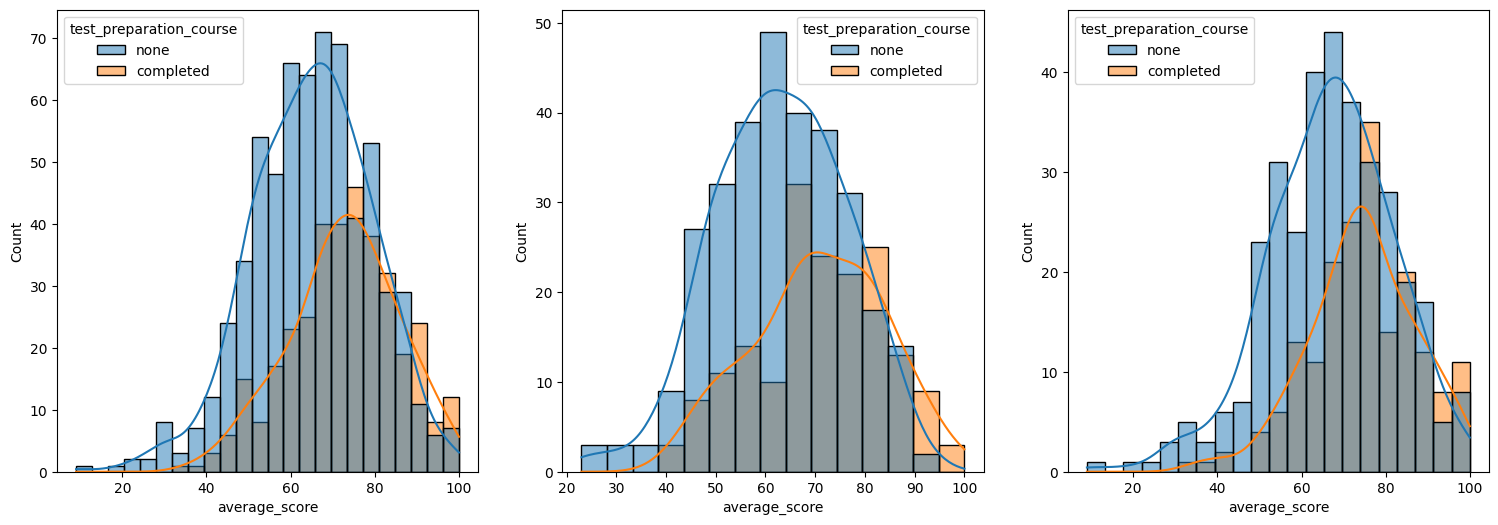

In [35]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax = sns.histplot(data=df,x="average_score",kde=True,hue="test_preparation_course")
plt.subplot(142)
ax = sns.histplot(data=df[df.gender=='male'],x="average_score",kde=True,hue="test_preparation_course")
plt.subplot(143)
ax = sns.histplot(data=df[df.gender=='female'],x="average_score",kde=True,hue="test_preparation_course")
plt.show()

1. Most of the students did not complete any test preparation course.
2. Students who completed test preparation course are getting more marks.

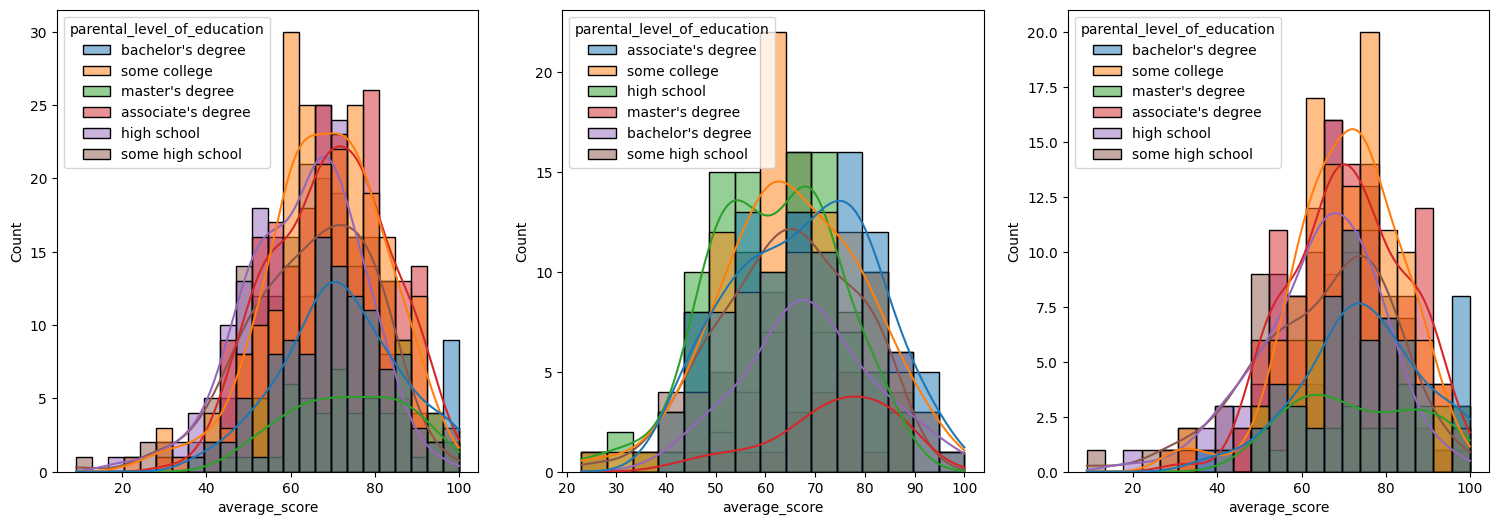

In [28]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental_level_of_education')
plt.show()

1. Most of the parents are from some college. 
2. More Students whose parents are from some college are getting maximum marks.
3. There is no much difference due to parental level of education.
4. There is a difference in female students whose parents belong to some college.

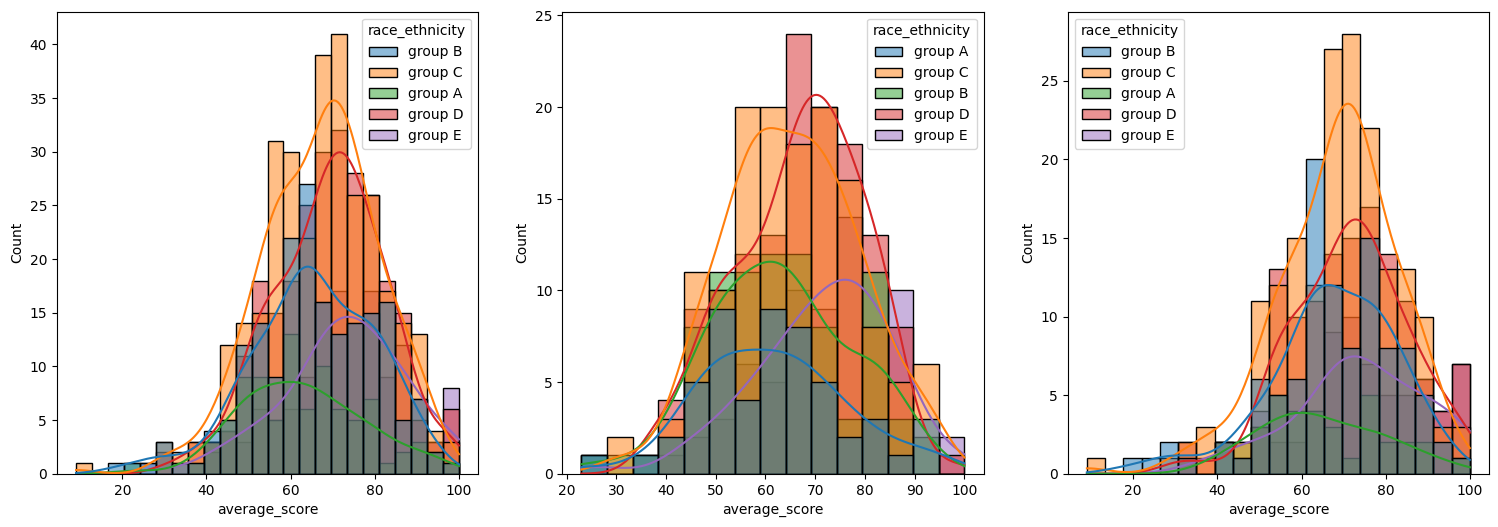

In [25]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='race_ethnicity')
plt.show()

1. Students of Group C are getting good scores or maximum scores.
2. Male students of Group D are getting maximum marks.
3. Female students of Group C are getting maximum marks.

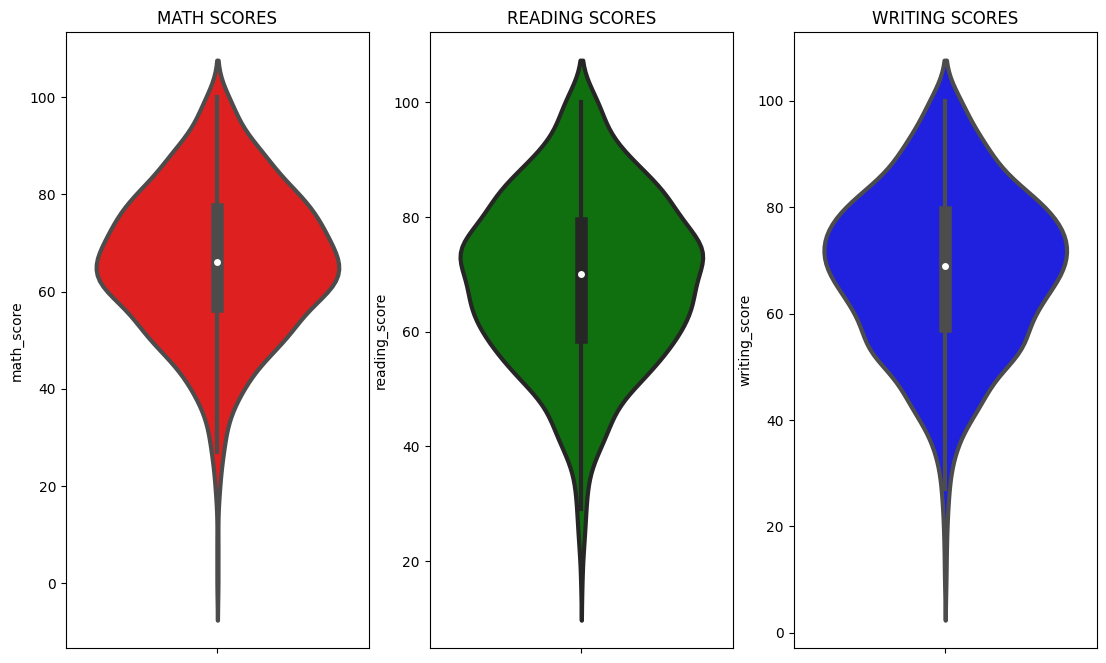

In [32]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

From the above three plots its clearly visible that:
1. Most of the students score in between 60-80 in Maths.
2. In reading and writing most of them score from 50-80

### Multivariate analysis using pieplot

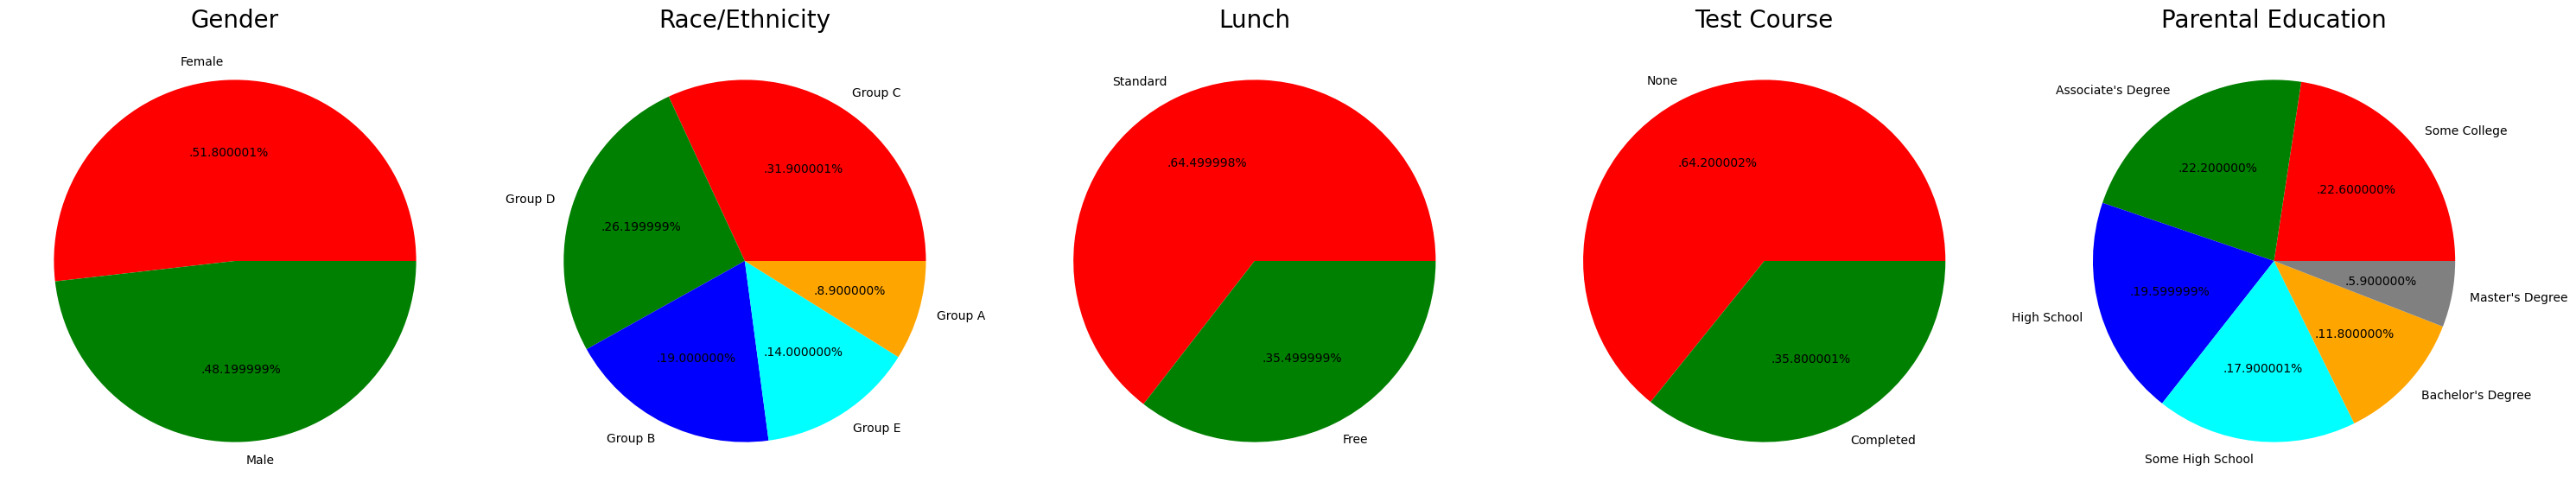

In [33]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

1. Number of Male and Female students is almost equal
2. Number students are greatest in Group C
3. Number of students who have standard lunch are greater
4. Number of students who have not enrolled in any test preparation course is greater
5. Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

### Check Outliers

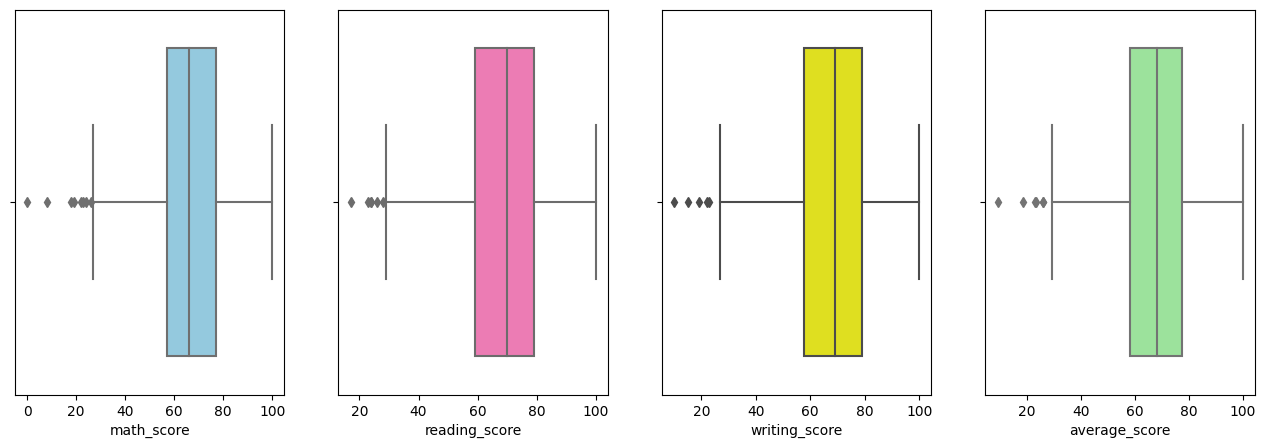

In [50]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(x = df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(x = df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(x = df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(x = df['average_score'],color='lightgreen')
plt.show()

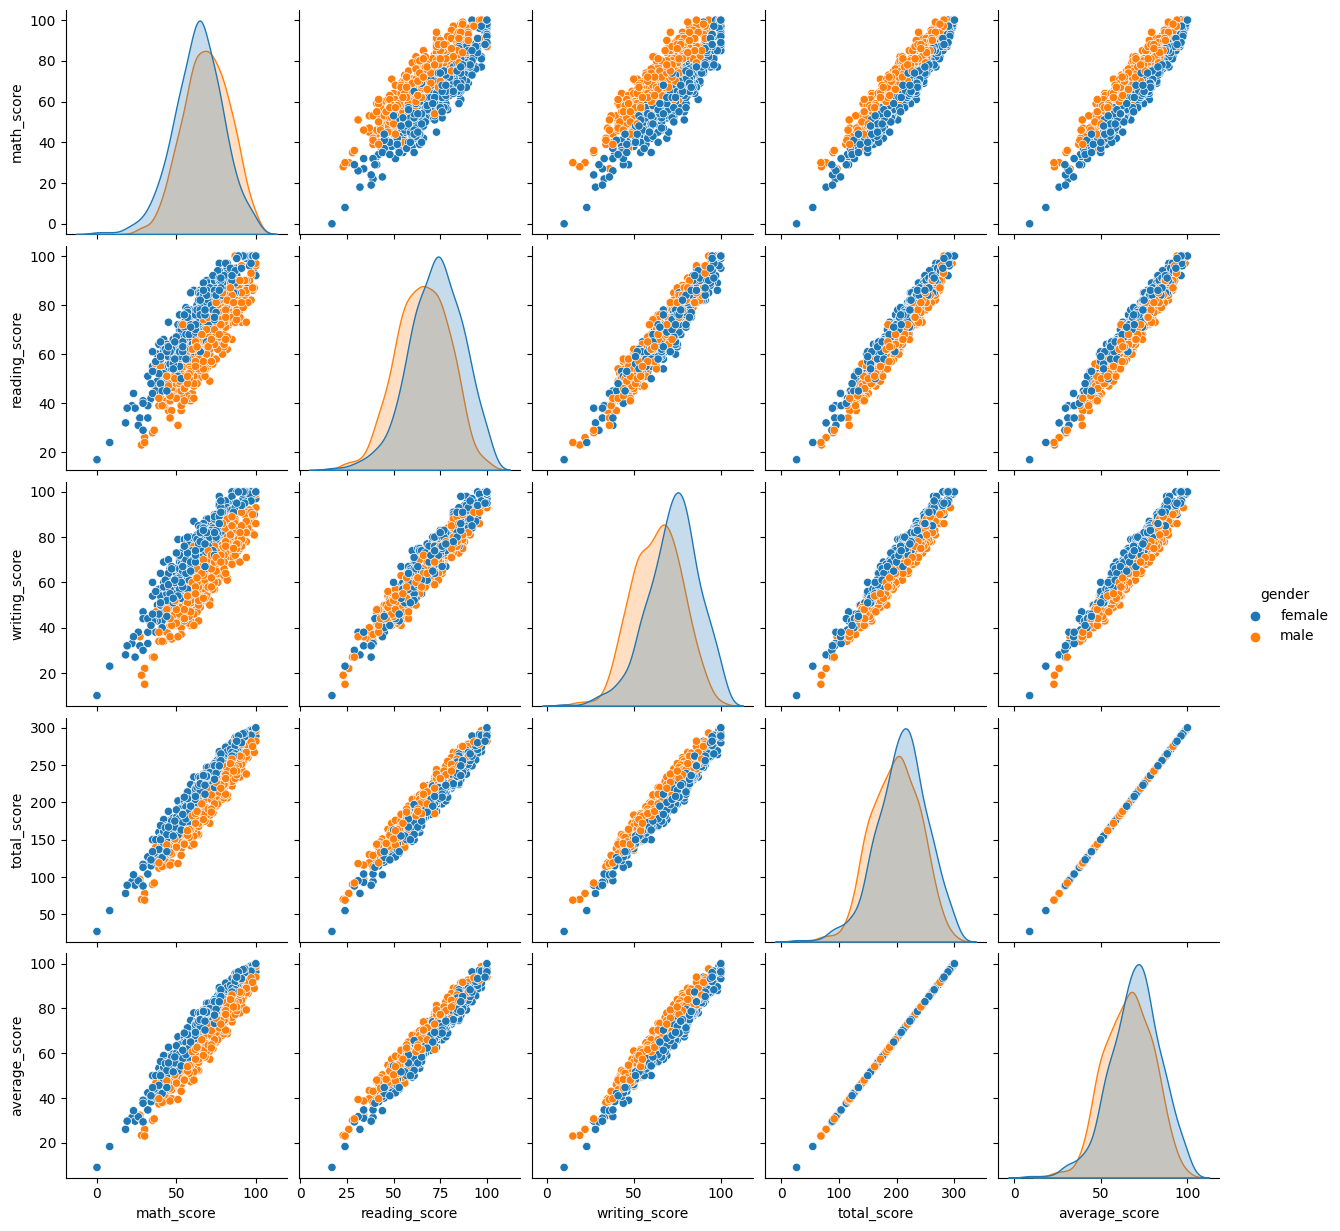

In [52]:
sns.pairplot(df,hue = 'gender')
plt.show()

1. The scores are in linear relationship with each other.

In [53]:
df = df.drop(["math_score","reading_score","writing_score"],axis=1)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,total_score,average_score
0,female,group B,bachelor's degree,standard,none,218,72.666667
1,female,group C,some college,standard,completed,247,82.333333
2,female,group B,master's degree,standard,none,278,92.666667
3,male,group A,associate's degree,free/reduced,none,148,49.333333
4,male,group C,some college,standard,none,229,76.333333


In [ ]:
df.to_csv("modified.csv")

### Conclusion
1. Student's Performance is related with lunch, race, parental level education
2. Females lead in pass percentage and also are top-scorers
3. Student's Performance is not much related with test preparation course
4. Finishing preparation course is beneficial.